<h1 style="color:lightblue;"><b><u>Import Library</u></b></h1>

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os # Untuk mengelola folder

# Mengatur 'style' default untuk semua grafik
sns.set_style("whitegrid")
# Mengatur agar angka float tampil dengan 2 desimal
pd.options.display.float_format = '{:,.2f}'.format

print("Libraries berhasil di-import.")

Libraries berhasil di-import.


<h1 style="color:lightblue;"><b><u>Memuat Data</u></b></h1>

<h3 style="color:lightblue;">Kita akan menggunakan file SuperStore_Processed.csv yang berisi semua fitur baru dari Feature Engineering.</h3>

In [19]:
processed_data_path = "../data/SuperStore_Processed.csv"

try:
    df = pd.read_csv(processed_data_path, parse_dates=['Order_Date', 'Ship_Date'])
    print(f"Berhasil memuat data yang sudah diproses dari: {processed_data_path}")
except FileNotFoundError:
    print(f"ERROR: File '{processed_data_path}' tidak ditemukan.")

Berhasil memuat data yang sudah diproses dari: ../data/SuperStore_Processed.csv


<h1 style="color:lightblue;"><b><u>Persiapan Folder Penyimpanan</u></b></h1>

<h3 style="color:lightblue;">Kode ini akan mendefinisikan di mana gambar akan disimpan dan membuat foldernya.</h3>

In [20]:
# Tentukan path folder untuk menyimpan gambar
# Sesuai struktur Anda: ../reports/figures/
figures_path = "../reports/figures/"

# Buat folder jika belum ada
os.makedirs(figures_path, exist_ok=True)

print(f"Folder untuk menyimpan gambar disiapkan di: {figures_path}")

Folder untuk menyimpan gambar disiapkan di: ../reports/figures/


<h1 style="color:lightblue;"><b><u>Pertanyaan 1 - Bagaimana Tren Penjualan & Keuntungan dari Waktu ke Waktu?</u></b></h1>

<h3 style="color:lightblue;">Kita ingin tahu apakah bisnis ini bertumbuh atau tidak, kita akan menggunakan Order_Year dan Order_Month yang telah kita buat.</h3>

Menganalisis tren Sales dan Profit...
-> Grafik disimpan ke: ../reports/figures/1_monthly_trends.png


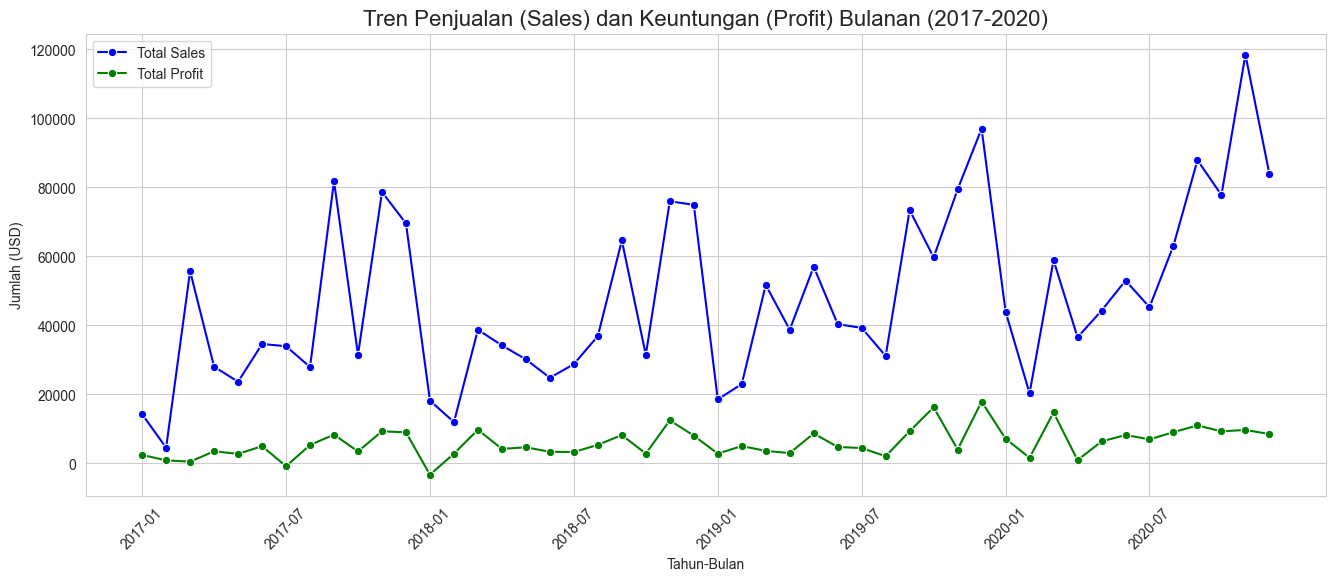

In [21]:
print("Menganalisis tren Sales dan Profit...")

# Buat kolom 'YearMonth'
df['YearMonth'] = df['Order_Date'].dt.to_period('M').astype(str)

# Agregasi Sales dan Profit per bulan
monthly_trends = df.groupby('YearMonth').agg(
    Total_Sales=('Sales', 'sum'),
    Total_Profit=('Profit', 'sum')
).reset_index()

# Membuat visualisasi (Line Chart)
plt.figure(figsize=(16, 6))
sns.lineplot(x='YearMonth', y='Total_Sales', data=monthly_trends, label='Total Sales', color='blue', marker='o')
sns.lineplot(x='YearMonth', y='Total_Profit', data=monthly_trends, label='Total Profit', color='green', marker='o')

plt.title('Tren Penjualan (Sales) dan Keuntungan (Profit) Bulanan (2017-2020)', fontsize=16)
plt.xlabel('Tahun-Bulan')
plt.ylabel('Jumlah (USD)')
plt.legend()
plt.xticks(rotation=45, ticks=monthly_trends['YearMonth'][::6])

# Simpan Gambar ke folder yang sudah disiapkan
file_simpan = os.path.join(figures_path, "1_monthly_trends.png")
plt.savefig(file_simpan, dpi=300, bbox_inches='tight')
print(f"-> Grafik disimpan ke: {file_simpan}")

# Tampilkan grafiknya
plt.show()

<h1 style="color:lightblue;"><b><u>Pertanyaan 2 - Kategori & Sub-Kategori Mana yang Paling Menguntungkan (dan Merugi)?</u></b></h1>

<h3 style="color:lightblue;">Kita ingin tahu produk apa yang jadi "bintang" dan apa yang jadi "masalah".</h3>

Menganalisis profitabilitas per Kategori dan Sub-Kategori...


C:\Users\lukit\AppData\Local\Temp\ipykernel_22360\1932246973.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=category_profit, x='Category', y='Profit', ax=ax1, palette='Blues_r')
C:\Users\lukit\AppData\Local\Temp\ipykernel_22360\1932246973.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=subcategory_profit, x='Profit', y='Sub-Category', ax=ax2, palette='RdYlGn')


-> Grafik disimpan ke: ../reports/figures/2_profit_by_category.png


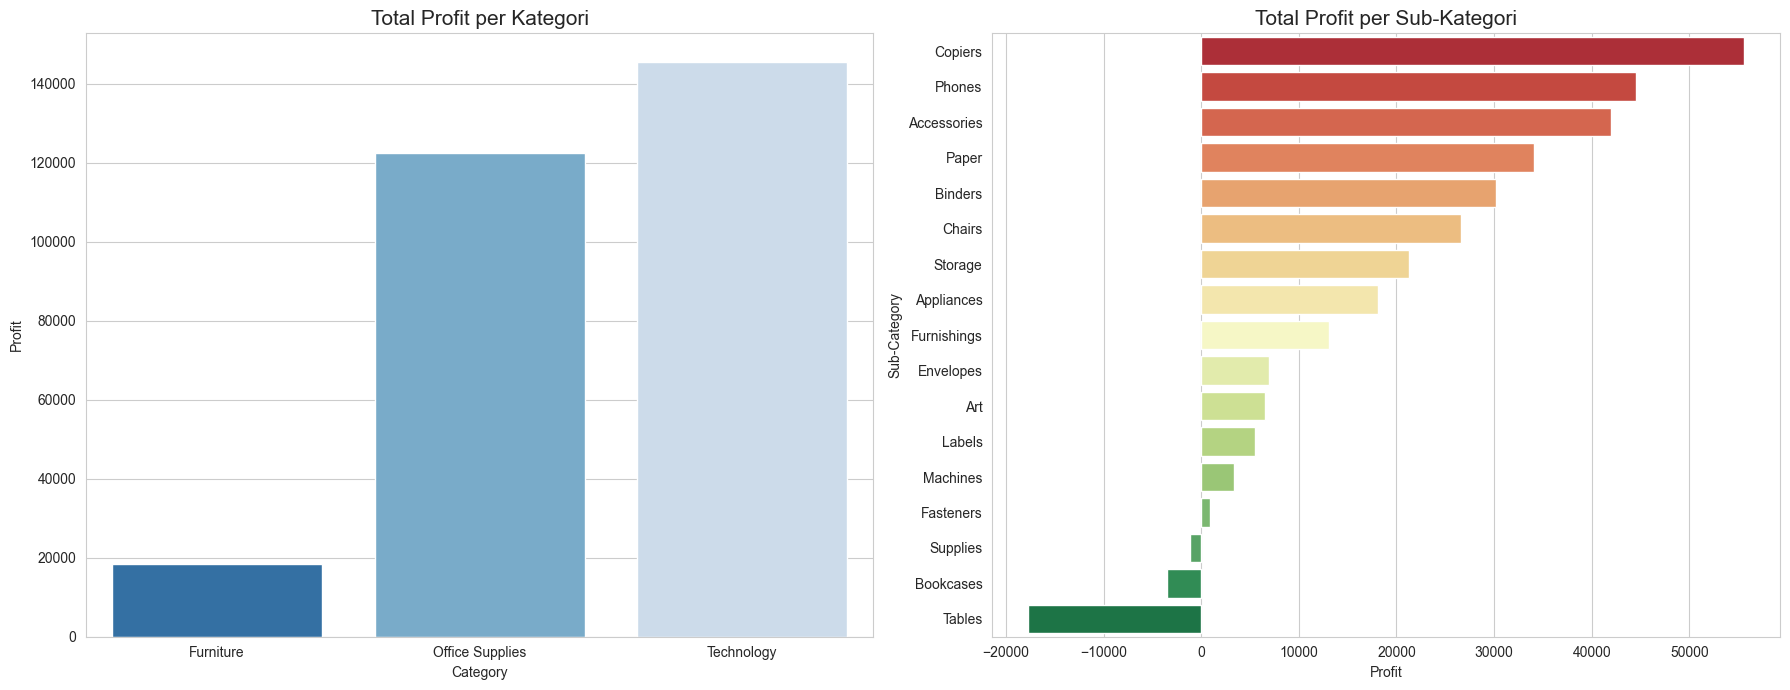

In [22]:
print("Menganalisis profitabilitas per Kategori dan Sub-Kategori...")

# Agregasi data
category_profit = df.groupby('Category')['Profit'].sum().reset_index()
subcategory_profit = df.groupby('Sub-Category')['Profit'].sum().sort_values(ascending=False).reset_index()

# Membuat visualisasi (Bar Chart)
# Kita gunakan `fig` untuk menyimpan gambar yang berisi 2 plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7)) 

# Grafik 1: Profit per Kategori
sns.barplot(data=category_profit, x='Category', y='Profit', ax=ax1, palette='Blues_r')
ax1.set_title('Total Profit per Kategori', fontsize=15)

# Grafik 2: Profit per Sub-Kategori
sns.barplot(data=subcategory_profit, x='Profit', y='Sub-Category', ax=ax2, palette='RdYlGn')
ax2.set_title('Total Profit per Sub-Kategori', fontsize=15)

plt.tight_layout()

# Simpan gambar ke folder yang sudah disiapkan
file_simpan = os.path.join(figures_path, "2_profit_by_category.png")
fig.savefig(file_simpan, dpi=300, bbox_inches='tight') # Kita simpan 'fig'
print(f"-> Grafik disimpan ke: {file_simpan}")

# Tampilkan grafiknya
plt.show()

Dari Grafik Ini: Anda mungkin akan kaget melihat ada Sub-Kategori yang Profit-nya negatif (rugi)! Ini adalah temuan penting.

<h1 style="color:lightblue;"><b><u>Pertanyaan 3 - Apakah Diskon Berpengaruh pada Kerugian?</u></b></h1>

<h3 style="color:lightblue;">Kita curiga bahwa diskon adalah penyebab kerugian. Mari kita buktikan dengan data.</h3>

Menganalisis hubungan antara Diskon (Discount) dan Profit...
-> Grafik disimpan ke: ../reports/figures/3_discount_vs_profit.png


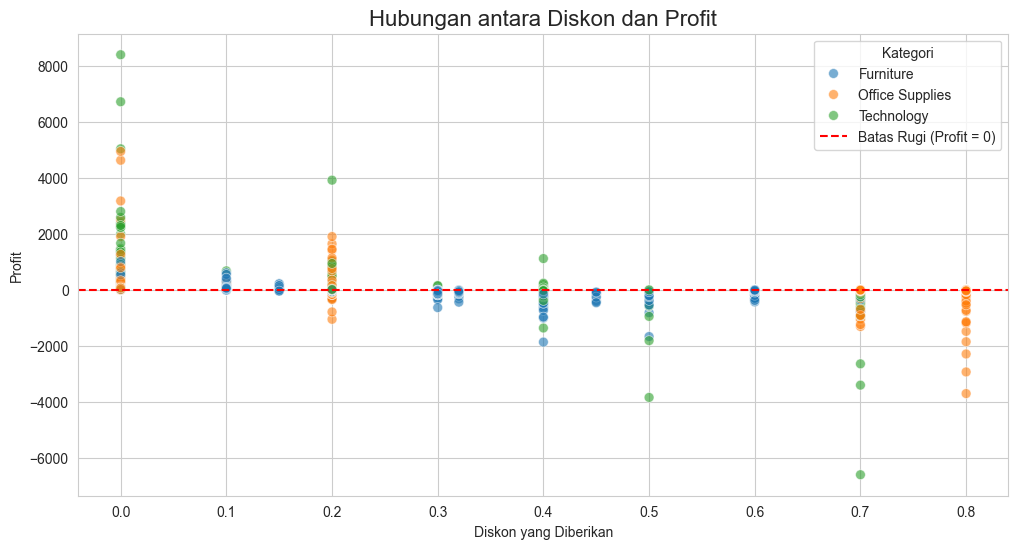

In [23]:
print("Menganalisis hubungan antara Diskon (Discount) dan Profit...")

plt.figure(figsize=(12, 6))

sns.scatterplot(
    data=df, 
    x='Discount', 
    y='Profit', 
    hue='Category', 
    alpha=0.6,
    s=50 
)
plt.axhline(0, color='red', linestyle='--', label='Batas Rugi (Profit = 0)')
plt.title('Hubungan antara Diskon dan Profit', fontsize=16)
plt.xlabel('Diskon yang Diberikan')
plt.ylabel('Profit')
plt.legend(title='Kategori')

# Simpan Gambar ke folder yang sudah disiapkan
file_simpan = os.path.join(figures_path, "3_discount_vs_profit.png")
plt.savefig(file_simpan, dpi=300, bbox_inches='tight')
print(f"-> Grafik disimpan ke: {file_simpan}")

# Tampilkan grafiknya
plt.show()

Dari Grafik Ini: Perhatikan apa yang terjadi ketika Discount (sumbu x) semakin besar. Anda mungkin akan melihat bahwa titik-titik (profit) mulai jatuh ke bawah garis merah (rugi). Artinya Diskon memang seberpengaruh itu terhadap kerugian.

<h1 style="color:lightblue;"><b><u>Pertanyaan 4 - Region Mana yang Paling Banyak Menjual?</u></b></h1>

<h3 style="color:lightblue;">Kita lihat performa berdasarkan geografi.</h3>

Menganalisis performa berdasarkan Region dan Segmen Pelanggan...


C:\Users\lukit\AppData\Local\Temp\ipykernel_22360\3618266929.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=region_sales, x='Region', y='Sales', ax=ax1, palette='Pastel1')
C:\Users\lukit\AppData\Local\Temp\ipykernel_22360\3618266929.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=segment_sales, x='Segment', y='Sales', ax=ax2, palette='Pastel2')


-> Grafik disimpan ke: ../reports/figures/4_sales_by_geo.png


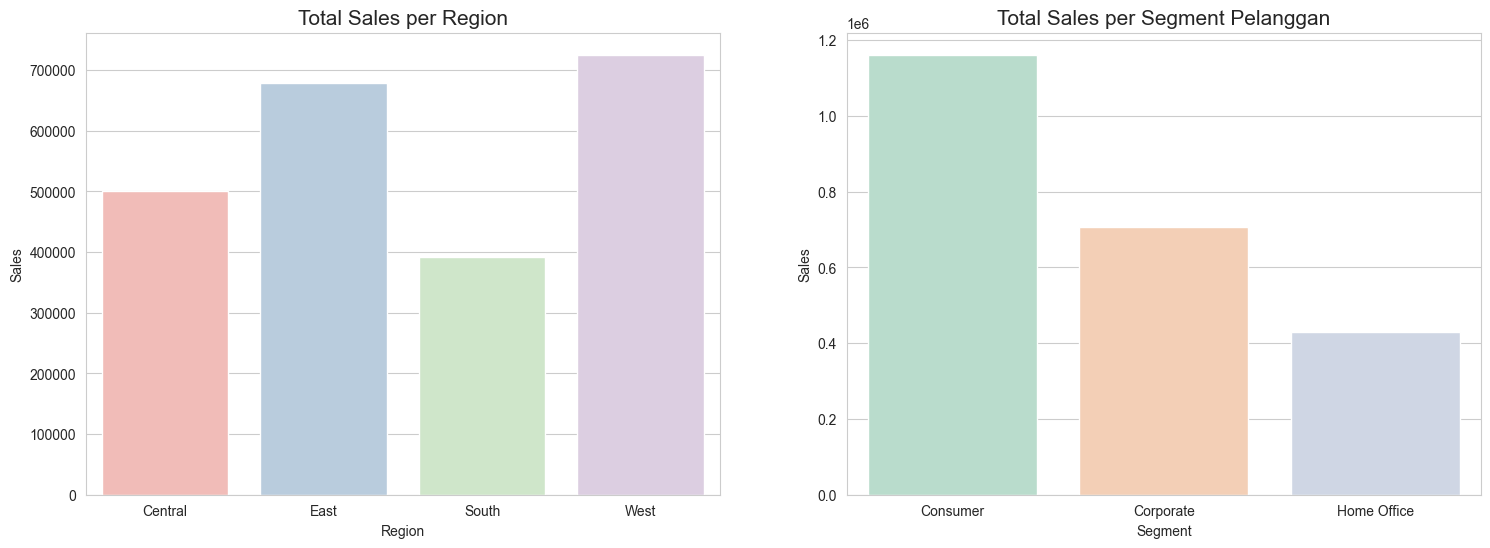

In [24]:
print("Menganalisis performa berdasarkan Region dan Segmen Pelanggan...")

# Kita gunakan `fig` lagi untuk menyimpan gambar yang berisi 2 plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

# Grafik 1: Total Sales per Region
region_sales = df.groupby('Region')['Sales'].sum().reset_index()
sns.barplot(data=region_sales, x='Region', y='Sales', ax=ax1, palette='Pastel1')
ax1.set_title('Total Sales per Region', fontsize=15)

# Grafik 2: Total Sales per Segment
segment_sales = df.groupby('Segment')['Sales'].sum().reset_index()
sns.barplot(data=segment_sales, x='Segment', y='Sales', ax=ax2, palette='Pastel2')
ax2.set_title('Total Sales per Segment Pelanggan', fontsize=15)

# Simpan Gambar ke folder yang sudah disiapkan
file_simpan = os.path.join(figures_path, "4_sales_by_geo.png")
fig.savefig(file_simpan, dpi=300, bbox_inches='tight') # Kita simpan 'fig'
print(f"-> Grafik disimpan ke: {file_simpan}")

# Tampilkan grafiknya
plt.show()

<h1 style="color:lightblue;"><b><u>Konfirmasi Selesai</u></b></h1>

In [25]:
print("--- Proses EDA Selesai ---")
print("Semua grafik telah dibuat dan disimpan di folder 'reports/figures/'.")
print("Anda bisa memeriksanya di panel file explorer VS Code.")

--- Proses EDA Selesai ---
Semua grafik telah dibuat dan disimpan di folder 'reports/figures/'.
Anda bisa memeriksanya di panel file explorer VS Code.
